In [1]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from myClassifiers import BinaryLogisticRegression, MulticlassLogisticRegression, Perceptron, FisherLinearDiscriminant

In [2]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

## Binary Logistic Regression

In [3]:
binary_model = BinaryLogisticRegression()
binary_model.fit(X, y, n_iter = 10**4, lr = 0.0001)
print('In-sample accuracy: '  + str(np.mean(binary_model.yhat == binary_model.y)))

In-sample accuracy: 0.9894551845342706


The following chart shows that the model is very confident when making it's predictions.

c:\Users\nolas\OneDrive\Documents\Python\DS-from-Scratch\RegularizedRegression\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


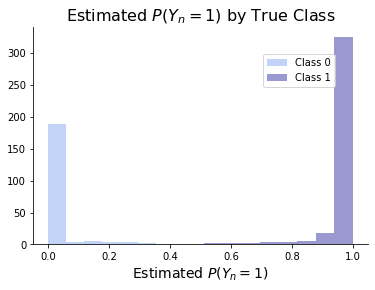

In [4]:
fig, ax = plt.subplots()
sns.distplot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, label = 'Class 0', color = 'cornflowerblue')
sns.distplot(binary_model.p[binary_model.yhat == 1], kde = False, bins = 8, label = 'Class 1', color = 'darkblue')
ax.legend(loc = 9, bbox_to_anchor = (0,0,1.59,.9))
ax.set_xlabel(r'Estimated $P(Y_n = 1)$', size = 14)
ax.set_title(r'Estimated $P(Y_n = 1)$ by True Class', size = 16)
sns.despine()
plt.show()

## Multiclass Logistic Regression

In [5]:
# import data for multiclass
wine = datasets.load_wine()
X = wine['data']
y = wine['target']

In [6]:
# fit model
multiclass_model = MulticlassLogisticRegression()
multiclass_model.fit(X, y, 10**4, 0.0001)
print('In-sample accuracy: '  + str(np.mean(multiclass_model.yhat == y)))

In-sample accuracy: 1.0


we can show how confident the model is when making predictions below.

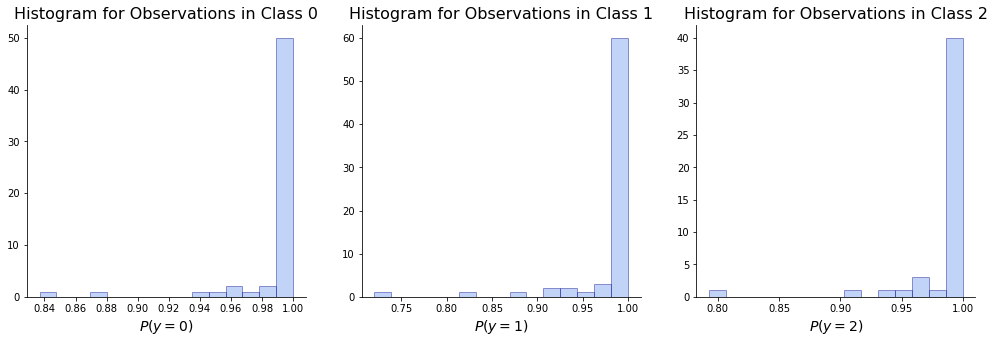

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (17, 5))
for i, y in enumerate(np.unique(y)):
    sns.distplot(multiclass_model.P[multiclass_model.y == y, i],
                 hist_kws=dict(edgecolor="darkblue"), 
                 color = 'cornflowerblue',
                 bins = 15, 
                 kde = False,
                 ax = ax[i]);
    ax[i].set_xlabel(xlabel = fr'$P(y = {y})$', size = 14)
    ax[i].set_title('Histogram for Observations in Class '+ str(y), size = 16)
sns.despine()

## Perceptron Algorithm

In [8]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [9]:
# fit the model
perceptron = Perceptron()
perceptron.fit(X, y, n_iter = 1e3, lr = 0.01)

In [10]:
# did the algorithm converge?
if perceptron.converged:
    print(f"Converged after {perceptron.iterations_until_convergence} iterations")
else:
    print("Not converged")

Not converged


In [11]:
# find the accuracy
np.mean(perceptron.yhat == perceptron.y)

0.9332161687170475

## Fischer's Linear Discriminant

In [12]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [13]:
model = FisherLinearDiscriminant()
model.fit(X, y)

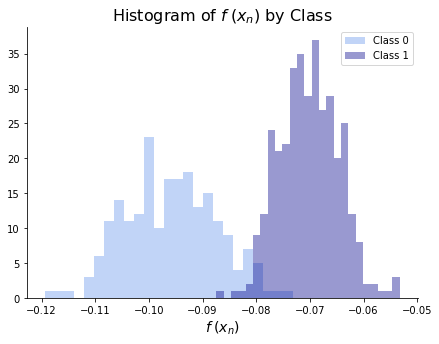

In [15]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(model.f[model.y == 0], bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(model.f[model.y == 1], bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()